In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [10]:
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
check=[f for f in train.columns if train[f].dtypes=='O']
print(len(check))
for f in check:
    print(f'col {f} values: {len(train[f].unique())}')

43
col MSZoning values: 5
col Street values: 2
col Alley values: 3
col LotShape values: 4
col LandContour values: 4
col Utilities values: 2
col LotConfig values: 5
col LandSlope values: 3
col Neighborhood values: 25
col Condition1 values: 9
col Condition2 values: 8
col BldgType values: 5
col HouseStyle values: 8
col RoofStyle values: 6
col RoofMatl values: 8
col Exterior1st values: 15
col Exterior2nd values: 16
col MasVnrType values: 5
col ExterQual values: 4
col ExterCond values: 5
col Foundation values: 6
col BsmtQual values: 5
col BsmtCond values: 5
col BsmtExposure values: 5
col BsmtFinType1 values: 7
col BsmtFinType2 values: 7
col Heating values: 6
col HeatingQC values: 5
col CentralAir values: 2
col Electrical values: 6
col KitchenQual values: 4
col Functional values: 7
col FireplaceQu values: 6
col GarageType values: 7
col GarageFinish values: 4
col GarageQual values: 6
col GarageCond values: 6
col PavedDrive values: 3
col PoolQC values: 4
col Fence values: 5
col MiscFeature val

In [13]:
check1=[f for f in test.columns if test[f].dtypes=='O']
print(len(check1))
for f in check1:
    print(f'col {f} values: {len(test[f].unique())}')

43
col MSZoning values: 6
col Street values: 2
col Alley values: 3
col LotShape values: 4
col LandContour values: 4
col Utilities values: 2
col LotConfig values: 5
col LandSlope values: 3
col Neighborhood values: 25
col Condition1 values: 9
col Condition2 values: 5
col BldgType values: 5
col HouseStyle values: 7
col RoofStyle values: 6
col RoofMatl values: 4
col Exterior1st values: 14
col Exterior2nd values: 16
col MasVnrType values: 5
col ExterQual values: 4
col ExterCond values: 5
col Foundation values: 6
col BsmtQual values: 5
col BsmtCond values: 5
col BsmtExposure values: 5
col BsmtFinType1 values: 7
col BsmtFinType2 values: 7
col Heating values: 4
col HeatingQC values: 5
col CentralAir values: 2
col Electrical values: 4
col KitchenQual values: 5
col Functional values: 8
col FireplaceQu values: 6
col GarageType values: 7
col GarageFinish values: 4
col GarageQual values: 5
col GarageCond values: 6
col PavedDrive values: 3
col PoolQC values: 3
col Fence values: 5
col MiscFeature val

In [14]:
train.shape

(1460, 81)

In [15]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
# graph=sns.countplot(train.dtypes,palette='pastel')
# for p in graph.patches:
#   height = p.get_height()
#   graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
# plt.show()

<AxesSubplot:>

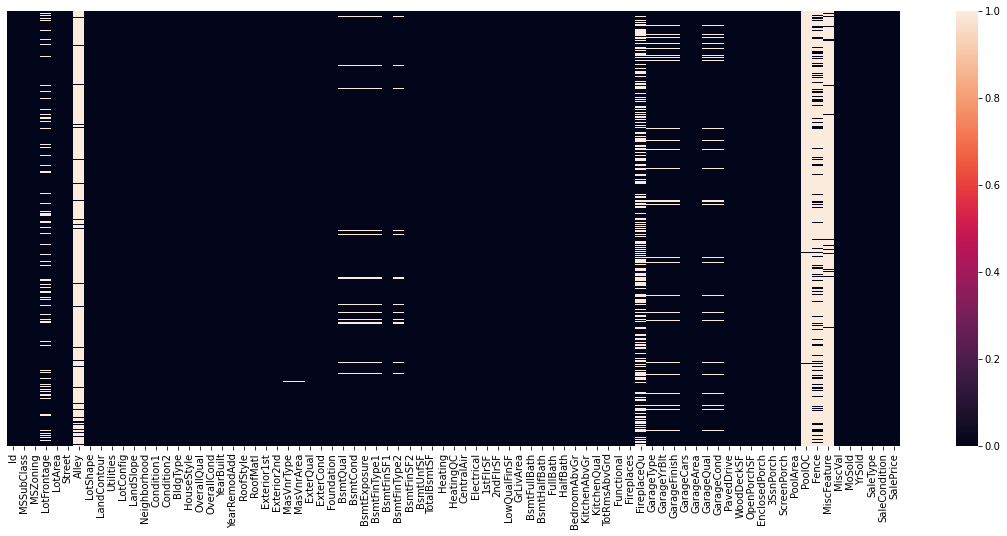

In [18]:
fig=plt.figure(figsize=(20,8))
sns.heatmap(train.isnull(),yticklabels=False)

In [19]:
date_col=[f for f in train.columns if 'Yr' in f or 'Year' in f]
date_col

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

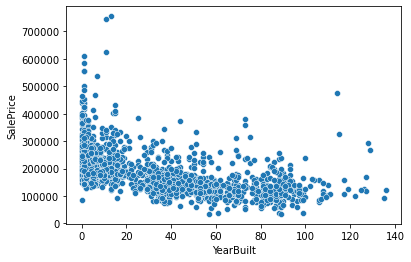

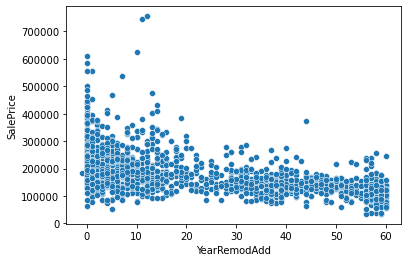

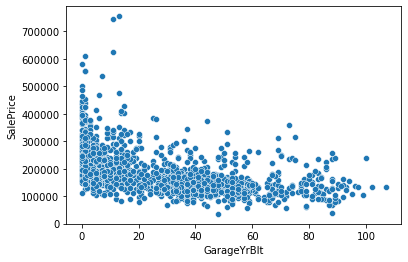

In [20]:
for f in date_col:
  data=train.copy()
  if f!='YrSold':
    data[f]=data['YrSold']-data[f]
    sns.scatterplot(x=data[f],y=data['SalePrice'])
    plt.show()

In [21]:
numeric_features_train=[f for f in train.columns if train[f].dtypes!='O' and train[f].dtypes!='bool' and f not in date_col]
numeric_features_train

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [22]:
discrete_col=[f for f in numeric_features_train if len(train[f].unique())<25 and f not in ['Id']]
discrete_col

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

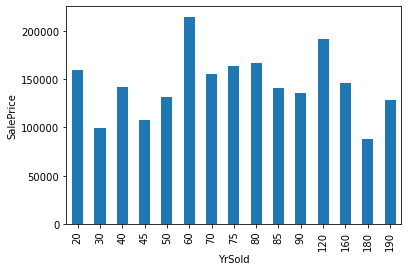

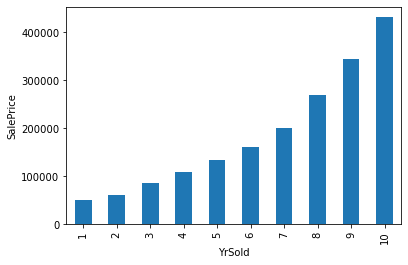

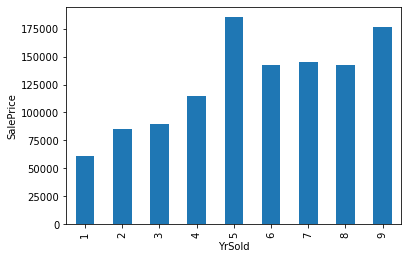

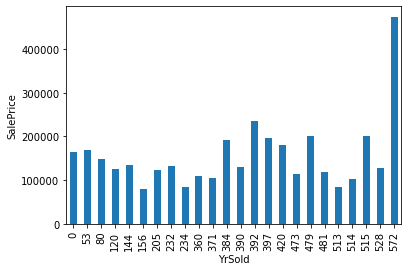

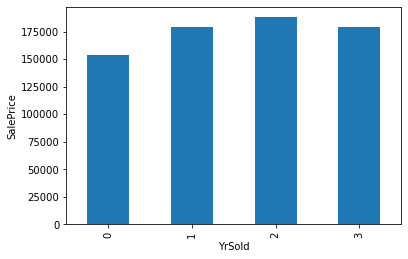

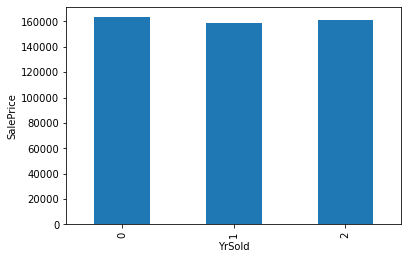

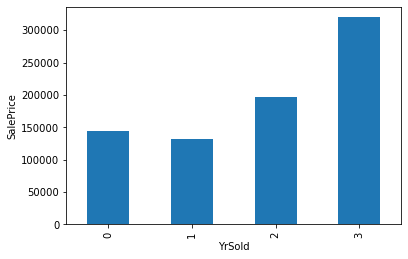

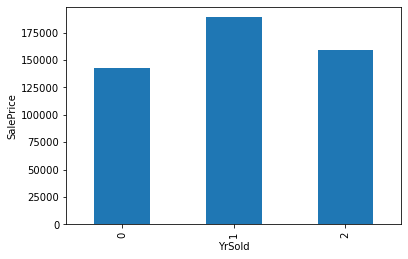

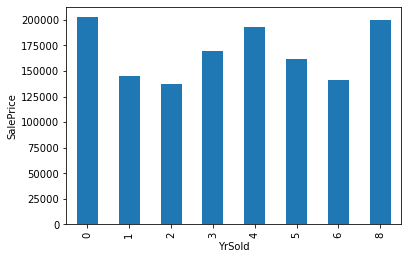

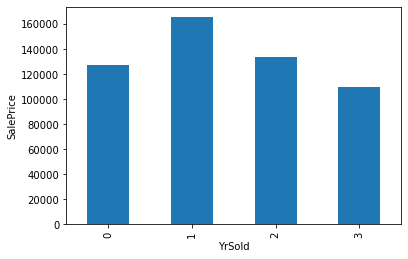

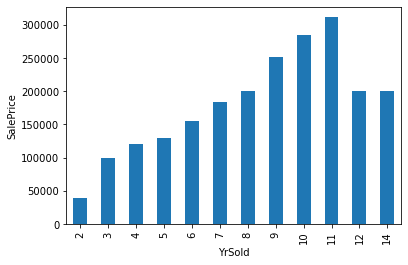

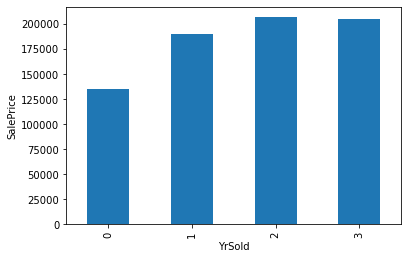

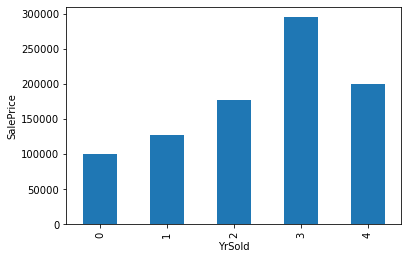

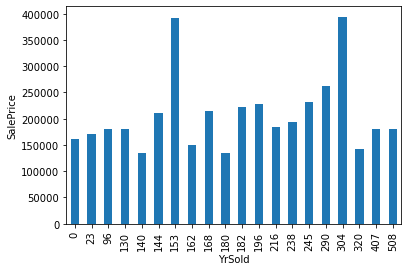

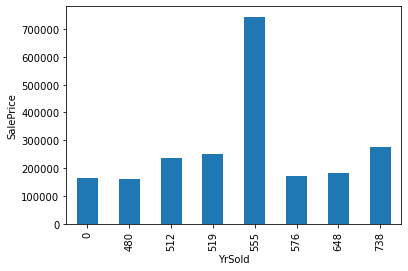

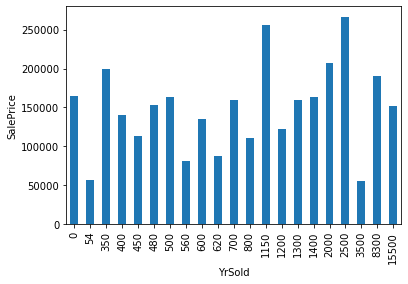

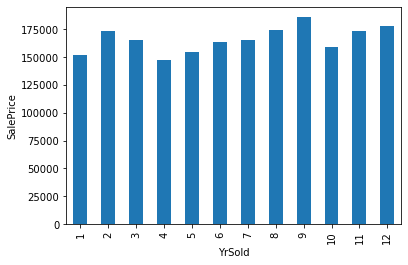

In [23]:
for col in discrete_col:
  data=train.copy()
  data.groupby(col)['SalePrice'].median().plot.bar()
  plt.xlabel(f)
  plt.ylabel('SalePrice')
  plt.show()

In [24]:
continuous_col=[f for f in numeric_features_train if f not in discrete_col+['Id']]
continuous_col

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

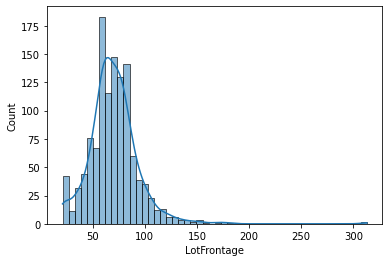

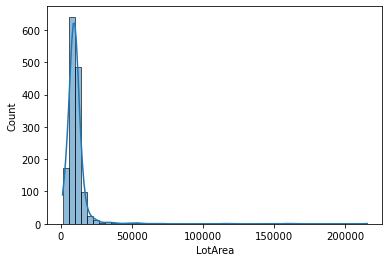

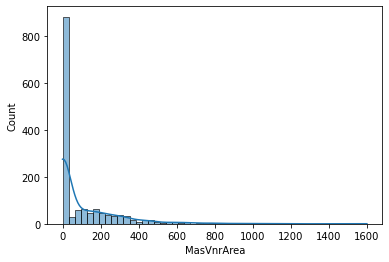

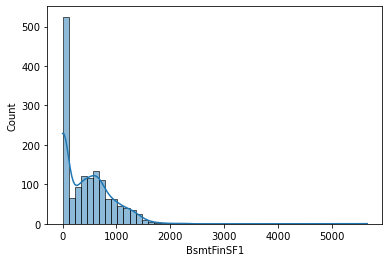

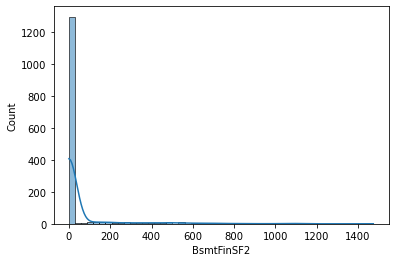

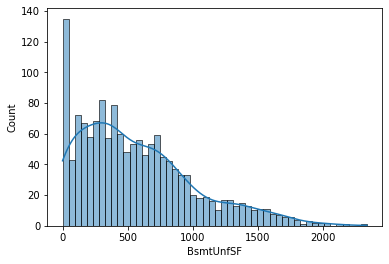

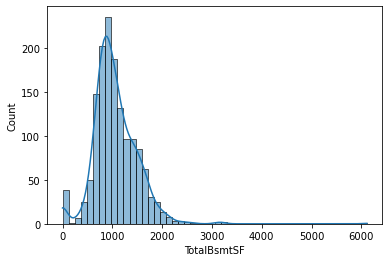

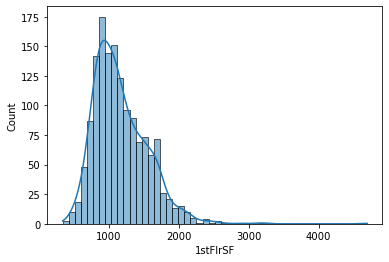

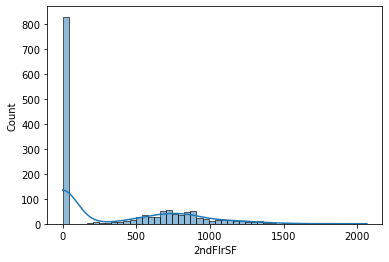

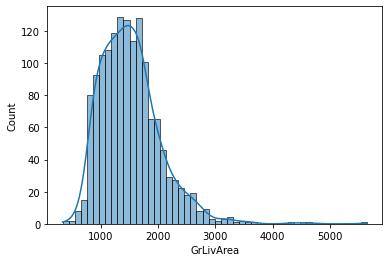

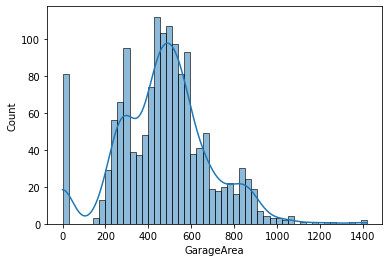

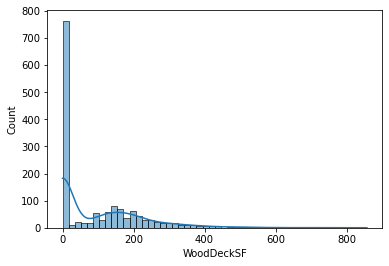

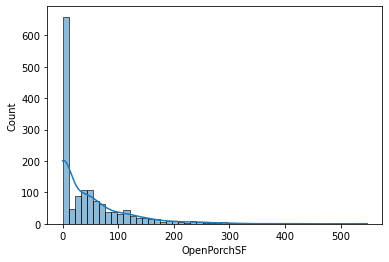

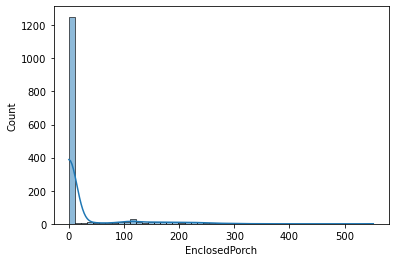

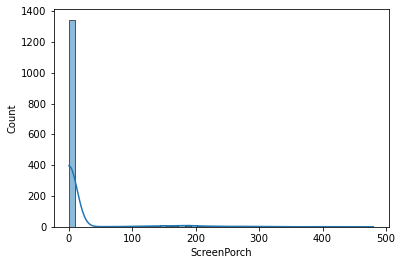

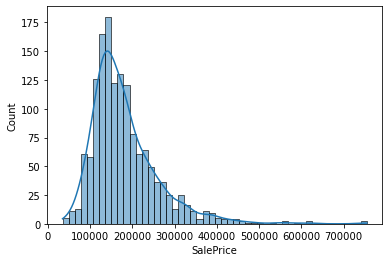

In [25]:
for col in continuous_col:
  sns.histplot(train[col],bins=50,kde=True)
  plt.show()

In [26]:
categorical_features_train=[f for f in train.columns if train[f].dtypes=='O']
categorical_features_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
for f in categorical_features_train:
  print('feature {} and its value count {} '.format(f,len(train[f].unique())))

feature MSZoning and its value count 5 
feature Street and its value count 2 
feature Alley and its value count 3 
feature LotShape and its value count 4 
feature LandContour and its value count 4 
feature Utilities and its value count 2 
feature LotConfig and its value count 5 
feature LandSlope and its value count 3 
feature Neighborhood and its value count 25 
feature Condition1 and its value count 9 
feature Condition2 and its value count 8 
feature BldgType and its value count 5 
feature HouseStyle and its value count 8 
feature RoofStyle and its value count 6 
feature RoofMatl and its value count 8 
feature Exterior1st and its value count 15 
feature Exterior2nd and its value count 16 
feature MasVnrType and its value count 5 
feature ExterQual and its value count 4 
feature ExterCond and its value count 5 
feature Foundation and its value count 6 
feature BsmtQual and its value count 5 
feature BsmtCond and its value count 5 
feature BsmtExposure and its value count 5 
feature B

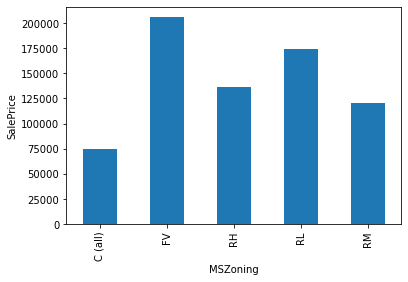

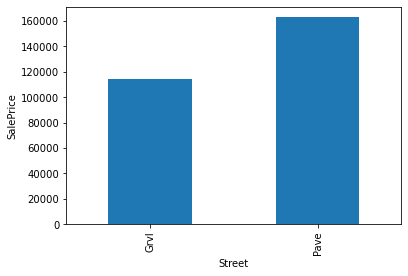

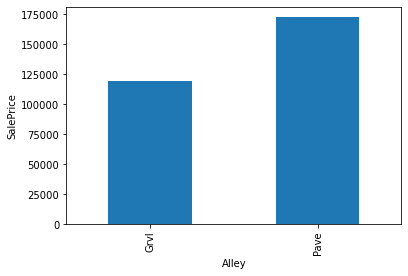

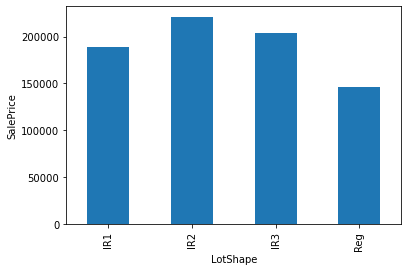

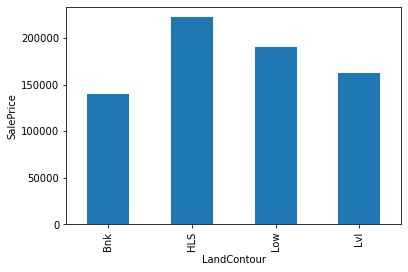

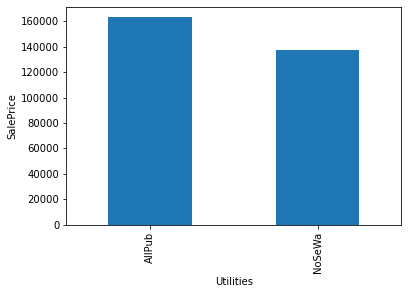

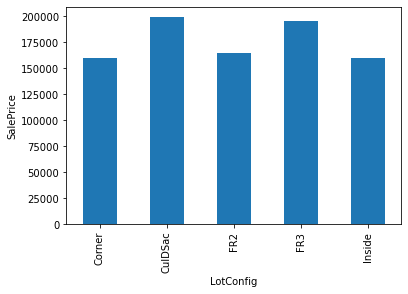

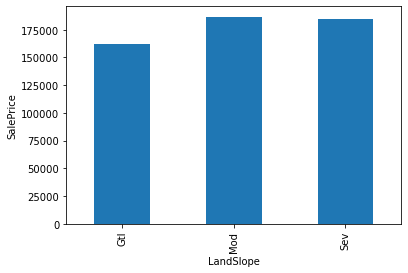

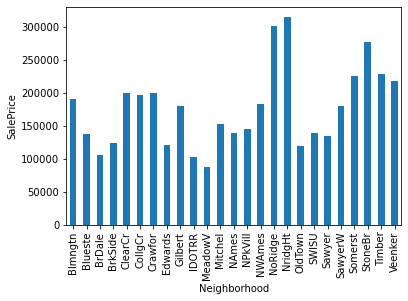

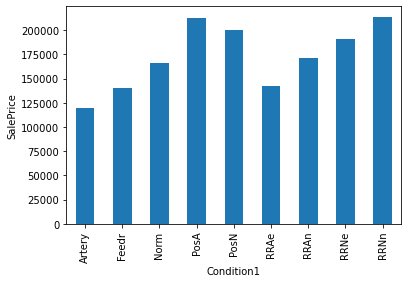

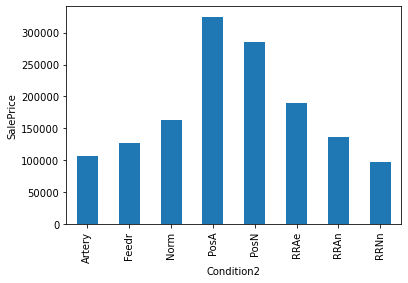

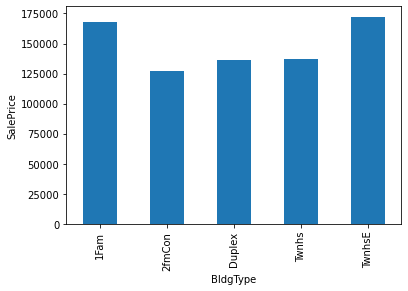

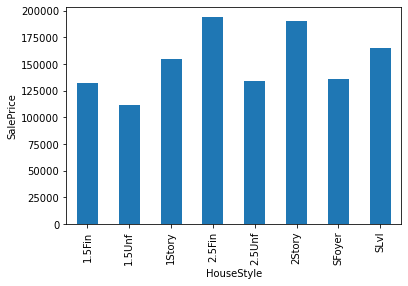

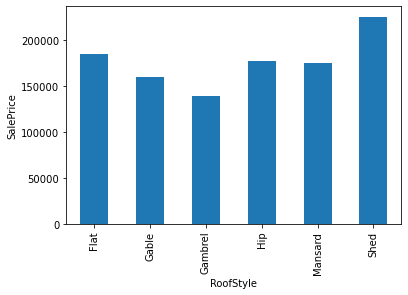

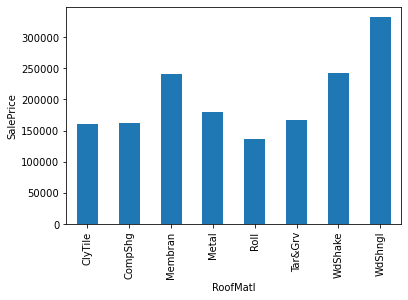

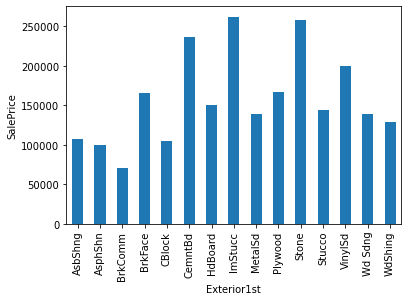

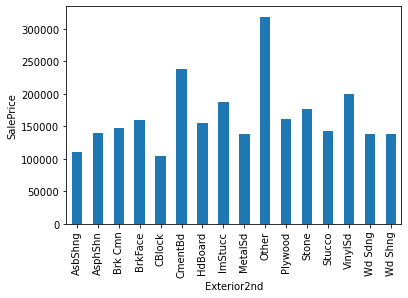

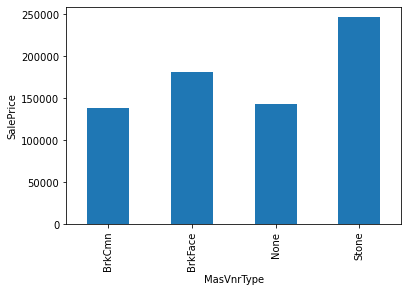

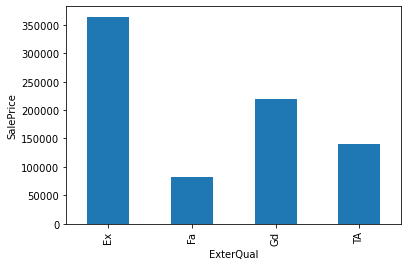

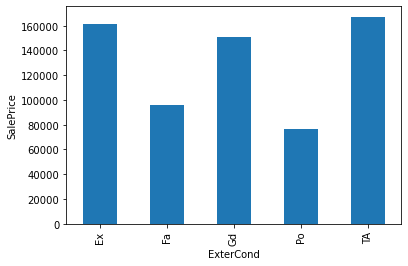

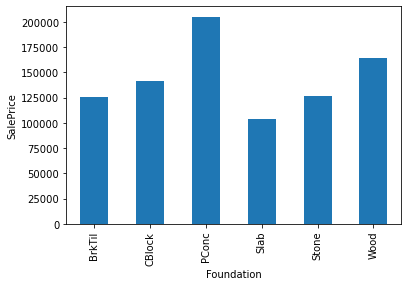

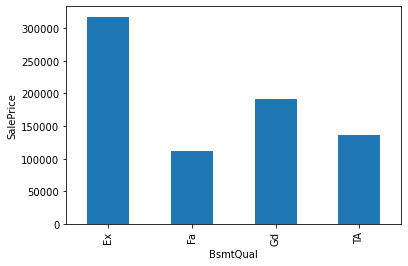

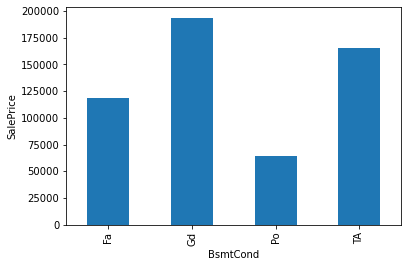

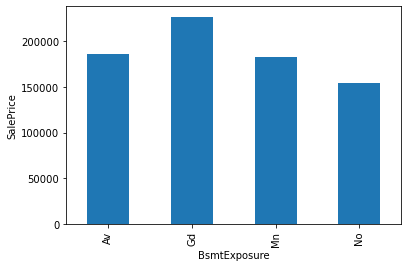

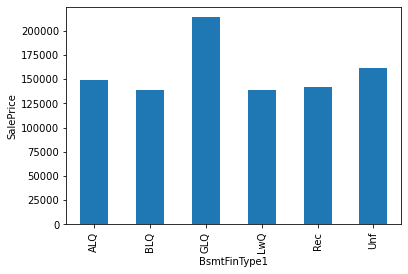

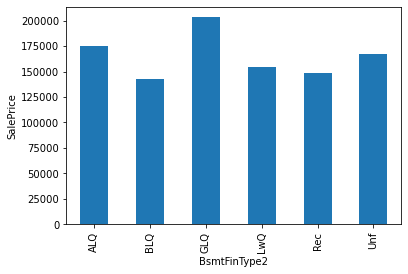

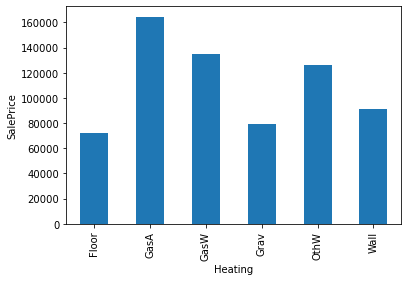

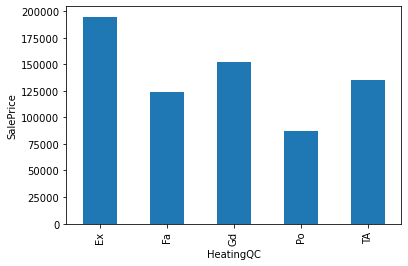

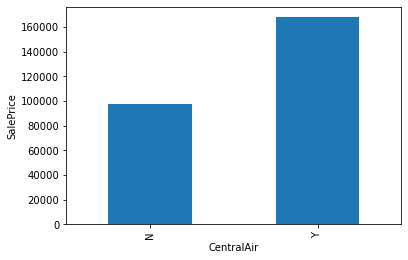

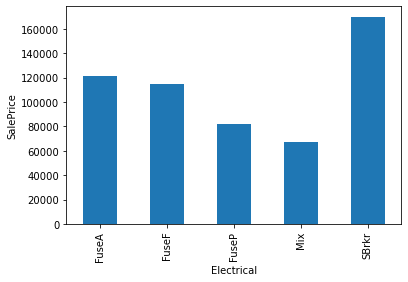

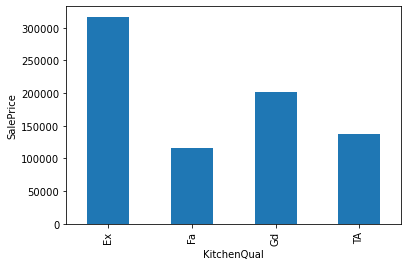

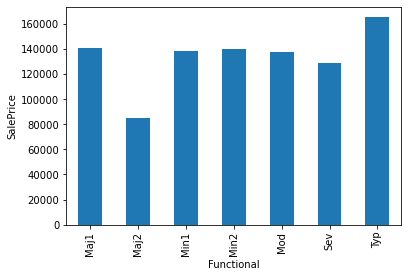

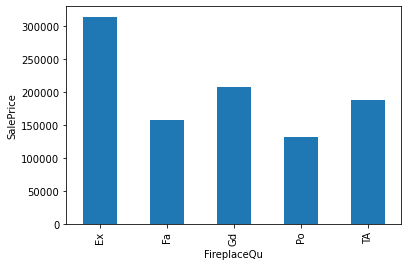

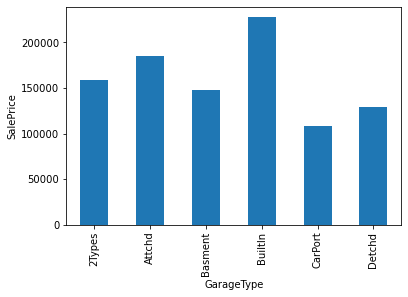

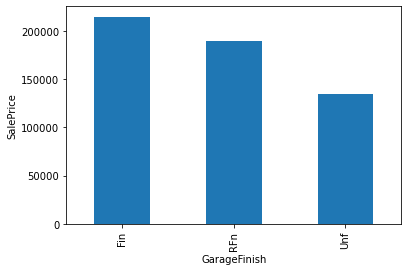

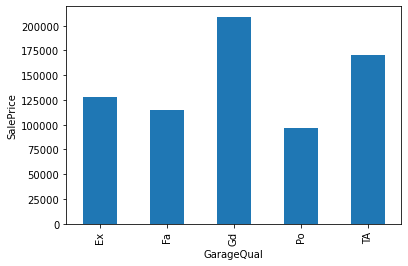

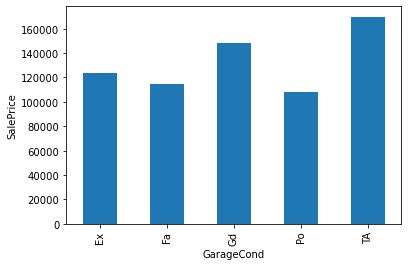

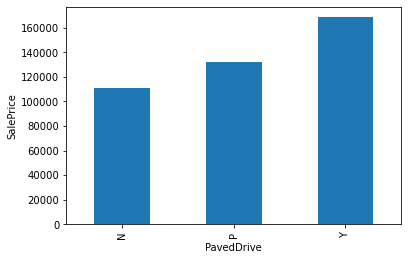

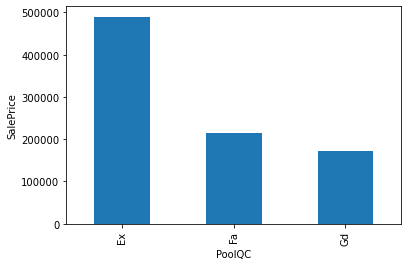

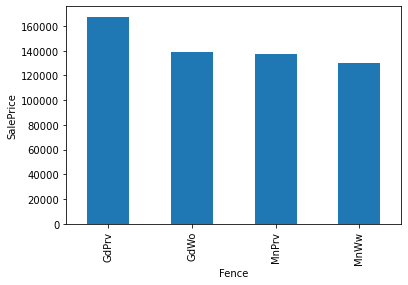

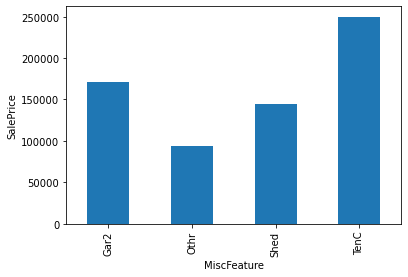

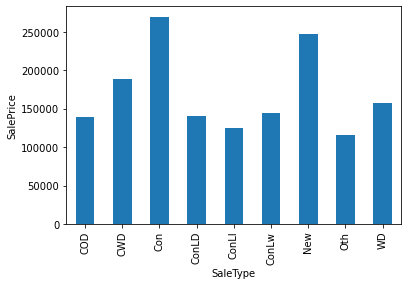

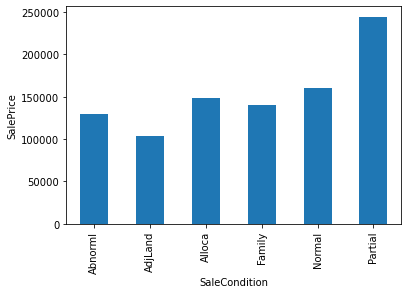

In [28]:
for f in categorical_features_train:
  train.groupby(f)['SalePrice'].median().plot.bar()
  plt.xlabel(f)
  plt.ylabel('SalePrice')
  plt.show()

In [29]:
missing_col=[f for f in train.columns if train[f].isnull().sum()>=1]
missing_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [30]:
def display(dataset,col):
  for f in col:
    print(f'Col {f} with null {dataset[f].isnull().sum()}')

In [31]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [32]:
def handle_nan_numeric(dataset,col):
  dataset[col]=dataset[col].fillna(dataset[col].median())
  return dataset

In [33]:
def handle_missing_categorical(dataset,col):
  dataset[col]=dataset[col].fillna(dataset[col].mode()[0])
  return dataset
  

In [34]:
display(train.copy(),missing_col)

Col LotFrontage with null 259
Col Alley with null 1369
Col MasVnrType with null 8
Col MasVnrArea with null 8
Col BsmtQual with null 37
Col BsmtCond with null 37
Col BsmtExposure with null 38
Col BsmtFinType1 with null 37
Col BsmtFinType2 with null 38
Col Electrical with null 1
Col FireplaceQu with null 690
Col GarageType with null 81
Col GarageYrBlt with null 81
Col GarageFinish with null 81
Col GarageQual with null 81
Col GarageCond with null 81
Col PoolQC with null 1453
Col Fence with null 1179
Col MiscFeature with null 1406


In [35]:
train.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1,inplace=True)

In [36]:
missing_col_train=[f for f in train.columns if train[f].isnull().sum()>=1]
numeric=[f for f in missing_col_train if train[f].dtypes!='O']
cat=[f for f in missing_col_train if train[f].dtypes=='O']

In [37]:
for f in numeric:
  train=handle_nan_numeric(train.copy(),f)
train[numeric].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [38]:
for f in cat:
  train=handle_missing_categorical(train.copy(),f)
train[cat].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [39]:
missing_col_test=[f for f in test.columns if test[f].isnull().sum()>=1]
display(test.copy(),missing_col_test)

Col MSZoning with null 4
Col LotFrontage with null 227
Col Alley with null 1352
Col Utilities with null 2
Col Exterior1st with null 1
Col Exterior2nd with null 1
Col MasVnrType with null 16
Col MasVnrArea with null 15
Col BsmtQual with null 44
Col BsmtCond with null 45
Col BsmtExposure with null 44
Col BsmtFinType1 with null 42
Col BsmtFinSF1 with null 1
Col BsmtFinType2 with null 42
Col BsmtFinSF2 with null 1
Col BsmtUnfSF with null 1
Col TotalBsmtSF with null 1
Col BsmtFullBath with null 2
Col BsmtHalfBath with null 2
Col KitchenQual with null 1
Col Functional with null 2
Col FireplaceQu with null 730
Col GarageType with null 76
Col GarageYrBlt with null 78
Col GarageFinish with null 78
Col GarageCars with null 1
Col GarageArea with null 1
Col GarageQual with null 78
Col GarageCond with null 78
Col PoolQC with null 1456
Col Fence with null 1169
Col MiscFeature with null 1408
Col SaleType with null 1


In [40]:
test.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],axis=1,inplace=True)

In [41]:
missing_col_test=[f for f in test.columns if test[f].isnull().sum()>=1]
numeric_test=[f for f in missing_col_test if test[f].dtypes!='O']
cat_test=[f for f in missing_col_test if test[f].dtypes=='O']

In [42]:
for f in numeric_test:
  test=handle_nan_numeric(test.copy(),f)
for f in cat_test:
  test=handle_missing_categorical(test.copy(),f)
print(test[numeric_test].isnull().sum())
print(test[cat_test].isnull().sum())

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64
MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64


In [43]:
cols_check=[f for f in train.columns if train[f].dtypes=='O']
same_val_col=[]
diff_val_col=[]
for i in cols_check:
    if len(train[i].unique())!=len(test[i].unique()):
        diff_val_col.append(i)
    else:
        same_val_col.append(i)

In [44]:
col_with_2values=[f for f in same_val_col if len(train[f].unique())<=2]
col_with_moreValues=[f for f in same_val_col if len(train[f].unique())>2]
print(f'Col with 2 values {col_with_2values}')
print(f'Col with more than 2 values {col_with_moreValues}')

Col with 2 values ['Street', 'CentralAir']
Col with more than 2 values ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [45]:
col_with_2values_test=[f for f in same_val_col if len(test[f].unique())<=2]
col_with_moreValues_test=[f for f in same_val_col if len(test[f].unique())>2]
print(f'Col with 2 values {col_with_2values_test}')
print(f'Col with more than 2 values {col_with_moreValues_test}')

Col with 2 values ['Street', 'CentralAir']
Col with more than 2 values ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [46]:
def label_col(dataset,col):
  le=LabelEncoder()
  dataset[col]=le.fit_transform(dataset[col])
  return dataset

In [47]:
from sklearn.preprocessing import LabelEncoder
flag=True
for col in col_with_2values+diff_val_col:
  train=label_col(train.copy(),col)
  test=label_col(test.copy(),col)



In [48]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,Reg,Lvl,0,Inside,Gtl,CollgCr,Norm,2,1Fam,5,7,5,2003,2003,Gable,1,12,13,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,1,Ex,1,4,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,4,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,Reg,Lvl,0,FR2,Gtl,Veenker,Feedr,2,1Fam,2,6,8,1976,1976,Gable,1,8,8,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,1,Ex,1,4,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,4,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [49]:
def oneHot(dataset,col):
  dummy=pd.get_dummies(dataset[col])
  dataset=pd.concat([dataset,dummy],axis=1)
  dataset.drop(col,axis=1,inplace=True)
  return dataset

In [50]:
for col in col_with_moreValues:
  train=oneHot(train.copy(),col)
for col in col_with_moreValues_test:
  test=oneHot(test.copy(),col)

In [51]:
train.head(2)

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,C (all),FV,RH,RL,RM,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,Corner,CulDSac,FR2,FR3,Inside,Gtl,Mod,Sev,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Flat,Gable,Gambrel,Hip,Mansard,Shed,BrkCmn,BrkFace,None,Stone,Ex,Fa,Gd,TA,Ex,Fa,Gd,Po,TA,BrkTil,CBlock,PConc,Slab,Stone,Wood,Ex,Fa,Gd,TA,Fa,Gd,Po,TA,Av,Gd,Mn,No,ALQ,BLQ,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf,Ex,Fa,Gd,Po,TA,Ex,Fa,Gd,TA,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,Unf,Ex,Fa,Gd,Po,TA,N,P,Y,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,1,0,2,5,7,5,2003,2003,1,12,13,196.0,706,0,150,856,1,1,4,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,4,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,0,2,2,6,8,1976,1976,1,8,8,0.0,978,0,284,1262,1,1,4,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,4,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [52]:
for f in continuous_col:
    if f!='SalePrice':
        train[f]=train[f]/np.max(train[f])
        test[f]=test[f]/np.max(test[f])

In [53]:
train.head(2)

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,C (all),FV,RH,RL,RM,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,Corner,CulDSac,FR2,FR3,Inside,Gtl,Mod,Sev,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Flat,Gable,Gambrel,Hip,Mansard,Shed,BrkCmn,BrkFace,None,Stone,Ex,Fa,Gd,TA,Ex,Fa,Gd,Po,TA,BrkTil,CBlock,PConc,Slab,Stone,Wood,Ex,Fa,Gd,TA,Fa,Gd,Po,TA,Av,Gd,Mn,No,ALQ,BLQ,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf,Ex,Fa,Gd,Po,TA,Ex,Fa,Gd,TA,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,Unf,Ex,Fa,Gd,Po,TA,N,P,Y,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,0.207668,0.039258,1,0,2,5,7,5,2003,2003,1,12,13,0.1225,0.125089,0.0,0.064212,0.140098,1,1,4,0.182438,0.413559,0,0.303084,1,0,2,1,3,1,8,0,2003.0,2,0.386460,4,0.000000,0.111517,0.0,0,0.0,0,0,2,2008,208500,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,0.255591,0.044600,1,0,2,2,6,8,1976,1976,1,8,8,0.0000,0.173281,0.0,0.121575,0.206547,1,1,4,0.268968,0.000000,0,0.223680,0,1,2,0,3,1,6,1,1976.0,2,0.324401,4,0.347725,0.000000,0.0,0,0.0,0,0,5,2007,181500,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [54]:
col_scale=['MSSubClass','OverallQual','OverallCond','TotRmsAbvGrd','MoSold']+date_col
for f in col_scale:
    train[f]=train[f]/np.max(train[f])
    test[f]=test[f]/np.max(test[f])

In [55]:
train['MiscVal']=train['MiscVal']/np.max(train['MiscVal'])
test['MiscVal']=test['MiscVal']/np.max(test['MiscVal'])

In [56]:
train.head(2)

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,C (all),FV,RH,RL,RM,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,Corner,CulDSac,FR2,FR3,Inside,Gtl,Mod,Sev,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Flat,Gable,Gambrel,Hip,Mansard,Shed,BrkCmn,BrkFace,None,Stone,Ex,Fa,Gd,TA,Ex,Fa,Gd,Po,TA,BrkTil,CBlock,PConc,Slab,Stone,Wood,Ex,Fa,Gd,TA,Fa,Gd,Po,TA,Av,Gd,Mn,No,ALQ,BLQ,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf,Ex,Fa,Gd,Po,TA,Ex,Fa,Gd,TA,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,Unf,Ex,Fa,Gd,Po,TA,N,P,Y,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,0.315789,0.207668,0.039258,1,0,2,5,0.7,0.555556,0.996517,0.996517,1,12,13,0.1225,0.125089,0.0,0.064212,0.140098,1,1,4,0.182438,0.413559,0,0.303084,1,0,2,1,3,1,0.571429,0,0.996517,2,0.386460,4,0.000000,0.111517,0.0,0,0.0,0,0.0,0.166667,0.999005,208500,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,0.105263,0.255591,0.044600,1,0,2,2,0.6,0.888889,0.983085,0.983085,1,8,8,0.0000,0.173281,0.0,0.121575,0.206547,1,1,4,0.268968,0.000000,0,0.223680,0,1,2,0,3,1,0.428571,1,0.983085,2,0.324401,4,0.347725,0.000000,0.0,0,0.0,0,0.0,0.416667,0.998507,181500,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [57]:
test.head(2)

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,C (all),FV,RH,RL,RM,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,Corner,CulDSac,FR2,FR3,Inside,Gtl,Mod,Sev,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Flat,Gable,Gambrel,Hip,Mansard,Shed,BrkCmn,BrkFace,None,Stone,Ex,Fa,Gd,TA,Ex,Fa,Gd,Po,TA,BrkTil,CBlock,PConc,Slab,Stone,Wood,Ex,Fa,Gd,TA,Fa,Gd,Po,TA,Av,Gd,Mn,No,ALQ,BLQ,GLQ,LwQ,Rec,Unf,ALQ,BLQ,GLQ,LwQ,Rec,Unf,Ex,Fa,Gd,Po,TA,Ex,Fa,Gd,TA,Maj1,Maj2,Min1,Min2,Mod,Sev,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,Unf,Ex,Fa,Gd,Po,TA,N,P,Y,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1461,0.105263,0.400,0.205336,1,0,2,2,0.5,0.666667,0.975622,0.975622,0,10,12,0.000000,0.116708,0.094364,0.126168,0.173111,0,1,3,0.175859,0.0,0,0.175859,0.0,0.0,1,0,2,1,0.333333,0,0.888536,1.0,0.490591,3,0.098315,0.000000,0.0,0,0.208333,0,0.000000,0.5,1.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,0.105263,0.405,0.252067,1,0,2,2,0.6,0.666667,0.974129,0.974129,0,11,13,0.083721,0.230175,0.000000,0.189720,0.260844,0,1,3,0.260844,0.0,0,0.260844,0.0,0.0,1,1,3,1,0.400000,0,0.887177,1.0,0.209677,3,0.275983,0.048518,0.0,0,0.000000,0,0.735294,0.5,1.0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [58]:
test.shape

(1459, 205)

In [59]:
train.shape

(1460, 206)

In [60]:
id=test['Id']
test=test.drop('Id',axis=1)
train.drop('Id',axis=1,inplace=True)


In [61]:
X=train.drop('SalePrice',axis=1)
y=train['SalePrice']

In [62]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(X)


In [63]:
pca.n_components_

3

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [80]:
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.3)


In [81]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
lr.score(x_val,y_val)

0.8714819928581743

In [83]:
p=lr.predict(test)


In [86]:
df=pd.DataFrame({'Id':id,'SalePrice':p})
df.to_csv('hp1.csv',index=False)
df.head()

,Id,SalePrice
0,1461,81844.359660
1,1462,109727.350038
2,1463,182564.485562
3,1464,180796.179514
4,1465,205931.219635
